In [1]:
import pandas as pd

In [2]:
# load data
bitcoin_daily = pd.read_csv("../crypto_news/bitcoin_news_sentiment_daily.csv")
coin_daily = pd.read_csv("../crypto_news/coinbase_news_sentiment_daily.csv")
google_trends = pd.read_csv("../google_search/google_trends_signal_daily.csv")
non_sentiment = pd.read_csv("../non_sentiment_features/features.csv")
btc_returns = pd.read_csv("../yfinance_return/BTC_return.csv")

In [3]:
bitcoin_daily.set_index("date_dt", inplace=True)
bitcoin_daily = bitcoin_daily.drop(columns=["Unnamed: 0"])
bitcoin_daily = bitcoin_daily.rename(columns={"signal": "btc_signal"})
bitcoin_daily.head()

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal
date_dt,,,,,,,,,
2021-04-14,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667
2021-04-15,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000
2021-04-16,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333
2021-04-17,0.0,0.0,3.0,0.000000,0.000000,0.674051,3.0,0.000000,NaN
2021-04-18,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000


In [4]:
coin_daily.set_index("date_dt", inplace=True)
coin_daily = coin_daily.drop(columns=["Unnamed: 0"])
# add coinbase prefix to columns
coin_daily.columns = ["coinbase_" + col for col in coin_daily.columns]
coin_daily.head()

,coinbase_positive_count,coinbase_negative_count,coinbase_neutral_count,coinbase_positive_avg_score,coinbase_negative_avg_score,coinbase_neutral_avg_score,coinbase_total_news_count,coinbase_total_news_score,coinbase_signal
date_dt,,,,,,,,,
2021-04-13,1.0,0.0,2.0,0.757015,0.000000,0.798267,3.0,0.757015,1.000000
2021-04-14,44.0,23.0,94.0,0.786364,0.817363,0.884039,161.0,15.800687,0.313433
2021-04-15,51.0,28.0,73.0,0.823400,0.890134,0.858108,152.0,17.069669,0.291139
2021-04-16,14.0,12.0,44.0,0.794744,0.798550,0.832263,70.0,1.543818,0.076923
2021-04-17,3.0,2.0,9.0,0.662382,0.733936,0.782948,14.0,0.519273,0.200000


In [5]:
google_trends.set_index("date", inplace=True)
google_trends.index.names = ["date_dt"]
google_trends.head()

,signal
date_dt,
2021-04-11,0.137663
2021-04-12,0.120701
2021-04-13,0.103739
2021-04-14,0.086777
2021-04-15,0.069814


In [6]:
non_sentiment.set_index("Unnamed: 0", inplace=True)
non_sentiment.index.names = ["date_dt"]
non_sentiment.head()

,Open,High,Low,Close,Adj Close,Volume,close_open,Daily Return,cumulative_return,30D_Moving_STD,...,DTB3_lag1,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-14,63523.753906,64863.097656,61554.796875,63109.695312,63109.695312,7.745178e+10,-414.058594,0.003237,0.003237,3795.270489,...,0.02,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094
2021-04-15,63075.195312,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10,238.816406,0.003237,0.003237,3795.270489,...,0.02,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094
2021-04-16,63258.503906,63594.722656,60222.531250,61572.789062,61572.789062,8.429301e+10,-1685.714844,-0.027501,-0.024353,3795.270489,...,0.02,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094
2021-04-17,61529.921875,62572.175781,60361.351562,60683.820312,60683.820312,6.613876e+10,-846.101562,-0.014438,-0.038439,3795.270489,...,0.02,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094
2021-04-18,60701.886719,61057.457031,52829.535156,56216.183594,56216.183594,9.746887e+10,-4485.703125,-0.073622,-0.109231,3795.270489,...,0.02,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609


In [7]:
btc_returns.set_index("Unnamed: 0", inplace=True)
btc_returns.index.names = ["date_dt"]
btc_returns.head()

,Returns
date_dt,
2014-09-18,-0.074643
2014-09-19,-0.072402
2014-09-20,0.035111
2014-09-21,-0.024968
2014-09-22,0.008317


In [8]:
# merge data on returns
data = pd.merge(bitcoin_daily, coin_daily, on="date_dt", how="left")
data = pd.merge(data, google_trends, on="date_dt", how="left")
data = pd.merge(data, non_sentiment, on="date_dt", how="left")
data = pd.merge(data, btc_returns, on="date_dt", how="left")

data.head()

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal,coinbase_positive_count,...,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,Returns
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-14,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667,44.0,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,-0.006220
2021-04-15,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000,51.0,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.003232
2021-04-16,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333,14.0,...,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094,-0.027887
2021-04-17,0.0,0.0,3.0,0.000000,0.000000,0.674051,3.0,0.000000,NaN,3.0,...,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094,-0.014543
2021-04-18,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000,5.0,...,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609,-0.076472


In [9]:
# save data
data.to_csv(r"../response_variable/final_data.csv")

In [10]:
# # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # save report
# report.show_html("../response_variable/report.html")

In [11]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# drop rows with missing values
data = data.dropna()
data = data.drop(columns=["Returns"])

In [12]:
from sklearn.metrics import mean_squared_error
import joblib


data = data.dropna()

# split data
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count",
    "positive_count",
    "total_news_score",
    "negative_avg_score",
    "positive_avg_score",
    "btc_signal",
    "signal",
    "Daily Return",
]
X = data[cols].drop(columns=["Daily Return"])
y = data["Daily Return"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
joblib.dump(model, "../response_variable/model_ideal.pkl")

Mean Squared Error: 0.00041022244955350663
R Squared: 0.6033785596635526
Adjusted R Squared: 0.5554353086338721


['../response_variable/model_ideal.pkl']

In [13]:
# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
results.to_csv("../response_variable/results_ideal.csv")

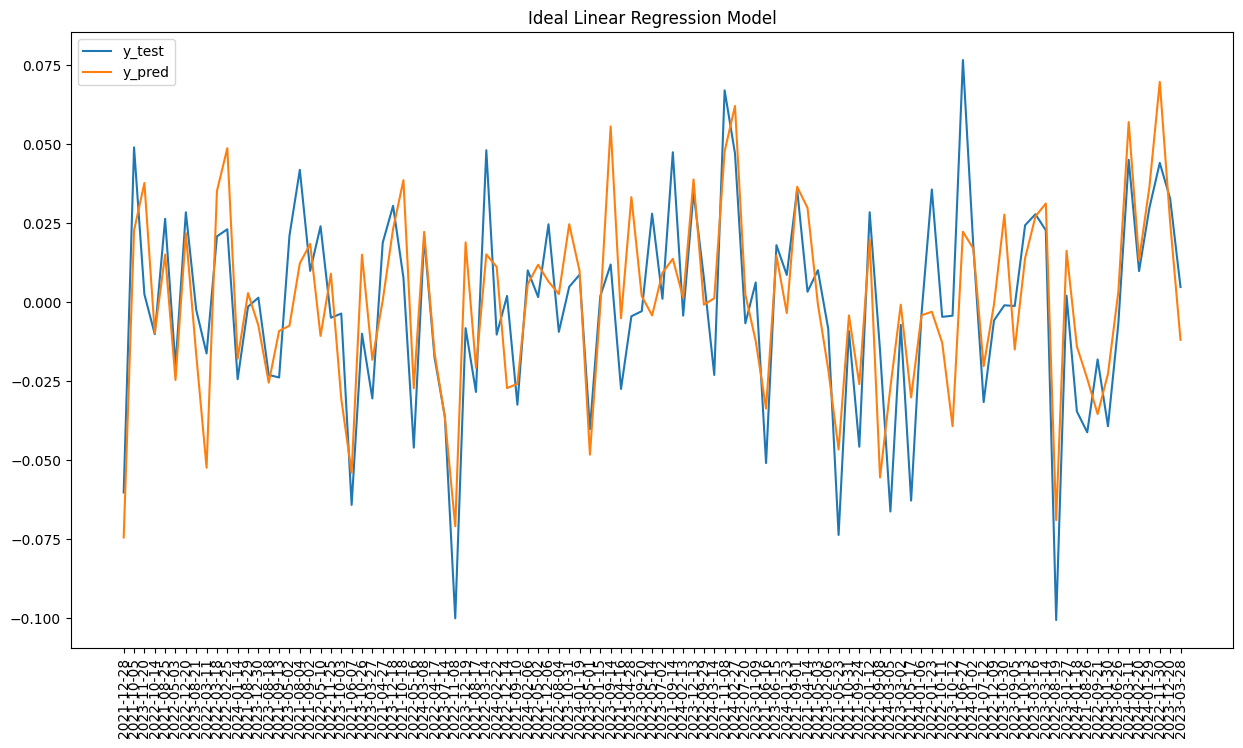

In [14]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")
plt.legend()
plt.title("Ideal Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
plt.show()

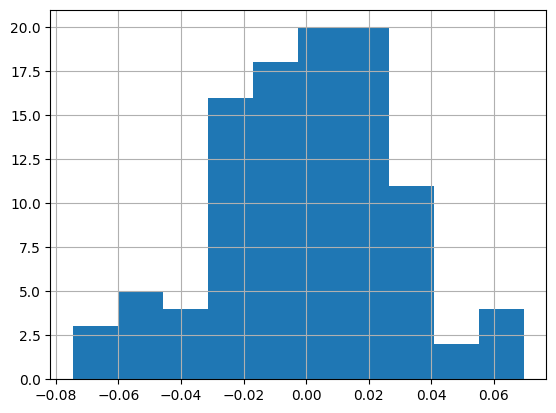

In [15]:
# plot hist fot y_pred
results["y_pred"].hist()
plt.show()

<Axes: >

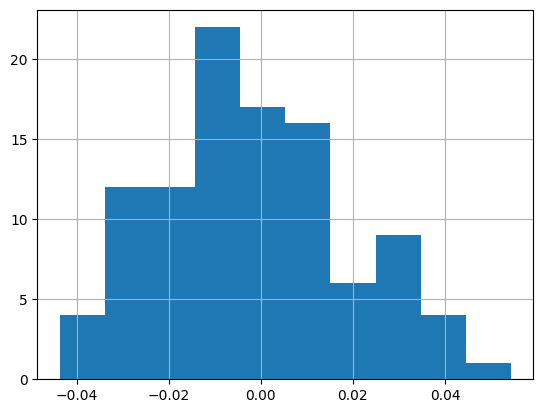

In [16]:
results["residuals"].hist()

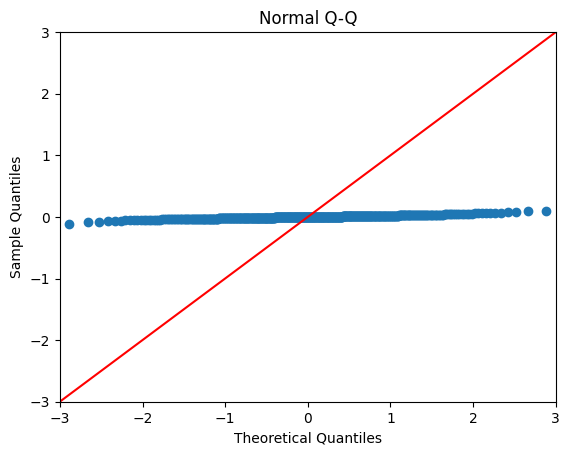

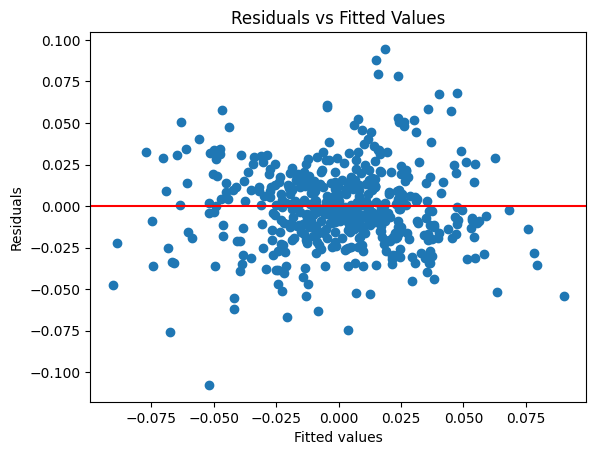

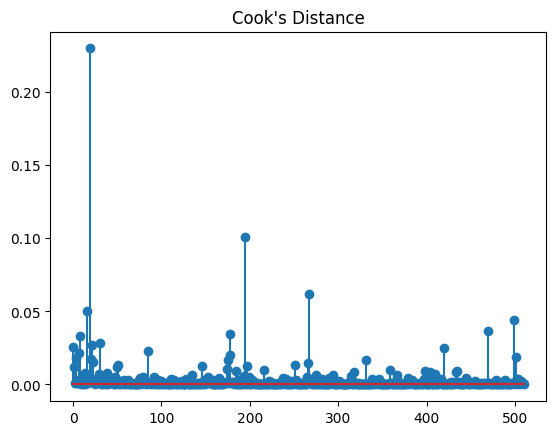

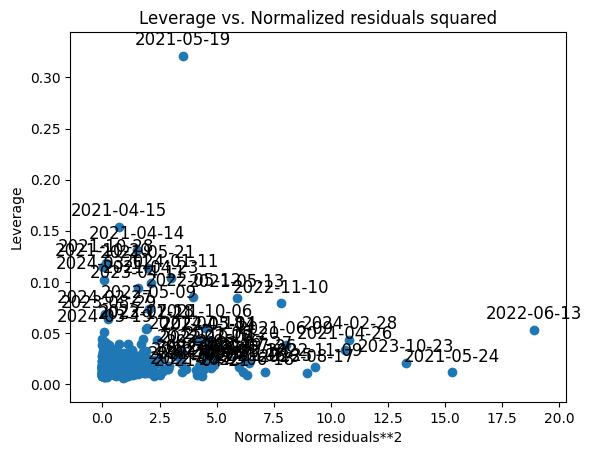

<Figure size 1000x1000 with 0 Axes>

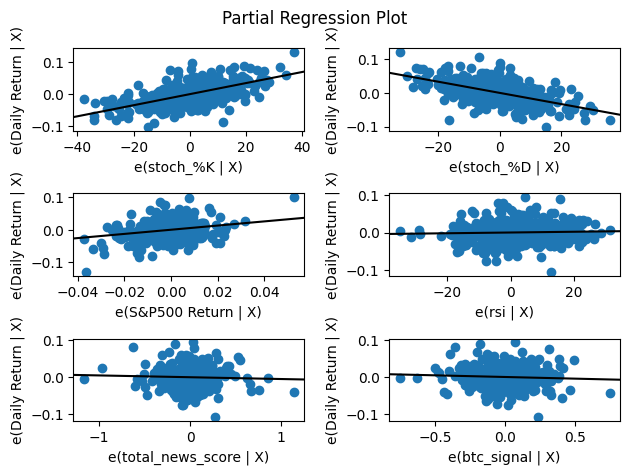

<Figure size 1000x1000 with 0 Axes>

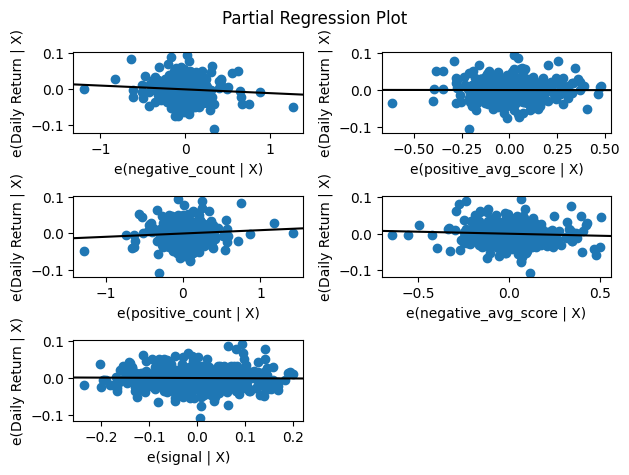

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit your model
model = sm.OLS(y, X)
results = model.fit(cov_type="HC3")

# Get predicted values
y_pred = results.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create a Q-Q plot of the residuals
sm.qqplot(results.resid, line="45")
plt.title("Normal Q-Q")
plt.show()

# Create a scatter plot
plt.scatter(y_pred, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="-")  # Add a horizontal line at y = 0
plt.title("Residuals vs Fitted Values")
plt.show()

# create a cooks distance plot
influence = results.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(range(len(cooks_distance)), cooks_distance)
plt.title("Cook's Distance")
plt.show()

# create a leverage plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2

plot_leverage_resid2(results)

# create a partial regression plot
from statsmodels.graphics.regressionplots import plot_partregress_grid

plt.figure(figsize=(10, 10))
# choose the variables you want to plot
plot_partregress_grid(
    results,
    ["stoch_%K", "stoch_%D", "S&P500 Return", "rsi", "total_news_score", "btc_signal"],
)
plt.tight_layout()

plt.show()

# now plot the other variables
plt.figure(figsize=(10, 10))
plot_partregress_grid(
    results,
    [
        "negative_count",
        "positive_avg_score",
        "positive_count",
        "negative_avg_score",
        "signal",
    ],
)
plt.tight_layout()

plt.show()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Daily Return   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              45.50
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                    2.73e-68
Time:                        01:33:40   Log-Likelihood:                          1169.7
No. Observations:                 511   AIC:                                     -2317.
Df Residuals:                     500   BIC:                                     -2271.
Df Model:                          11                                                  
Covariance Type:                  HC3                                                  
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
stoch_%K               0.0017      0.000     15.373      0.000       0.002       0.002
stoch_%D              -0.0017      0.000    -13.894      0.000      -0.002      -0.001
S&P500 Return          0.6458      0.171      3.783      0.000       0.311       0.980
rsi                    0.0001   9.37e-05      1.080      0.280   -8.24e-05       0.000
negative_count        -0.0105      0.008     -1.385      0.166      -0.025       0.004
positive_count         0.0092      0.007      1.353      0.176      -0.004       0.023
total_news_score      -0.0049      0.008     -0.640      0.522      -0.020       0.010
negative_avg_score    -0.0111      0.009     -1.176      0.240      -0.030       0.007
positive_avg_score    -0.0004      0.010     -0.042      0.966      -0.021       0.020
btc_signal            -0.0090      0.009     -1.053      0.292      -0.026       0.008
signal                -0.0056      0.013     -0.435      0.664      -0.031       0.020
==============================================================================
Omnibus:                       25.145   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.801
Skew:                           0.210   Prob(JB):                     1.03e-13
Kurtosis:                       4.622   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC3)
[3] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Squared Error: 0.0007576527372967878
R Squared: 0.5321583454997147
Adjusted R Squared: 0.48158086933752176


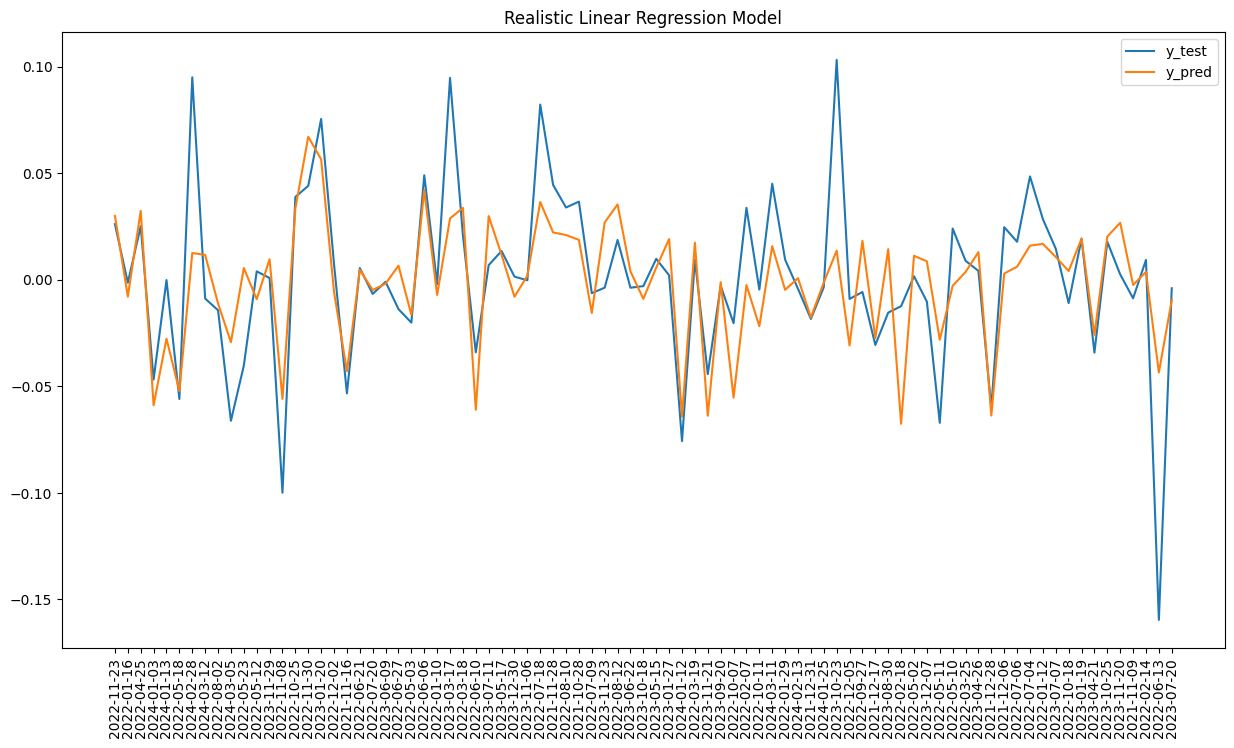

In [19]:
# more realistic model

data["total_news_score_lag"] = data["total_news_score"].shift(1)
data["positive_count_lag"] = data["positive_count"].shift(1)
data["negative_count_lag"] = data["negative_count"].shift(1)

# cumulative sum for last 100 days of news sentiment
data["total_news_score_lag_100_sum"] = data["total_news_score_lag"].rolling(100).sum()


data = data.dropna()

# split data
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count_lag",
    "positive_count_lag",
    "total_news_score_lag_100_sum",
    "signal",
    "Daily Return",
]
X = data[cols].drop(columns=["Daily Return"])
y = data["Daily Return"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
joblib.dump(model, "../response_variable/model_realisitic.pkl")

# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
results.to_csv("../response_variable/results_realistic.csv")

# plot results
plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")
plt.legend()
plt.title("Realistic Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
plt.show()